# CS 5661 Homework 3
# Kevin Gamboa
## 301295051

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

In [2]:
face_list = []
for i in range(0,400):
    file_name = "./Face/" + str(i) + ".jpg"
    face_list.append(mpimg.imread(file_name))

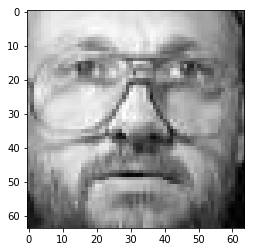

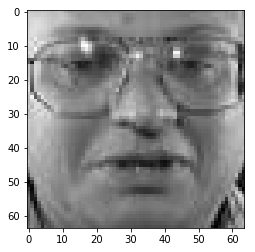

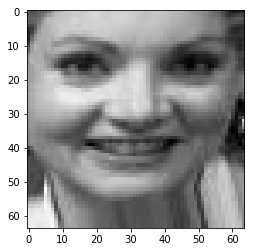

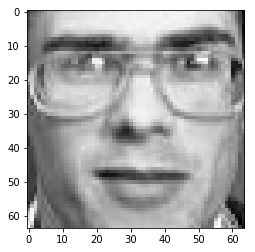

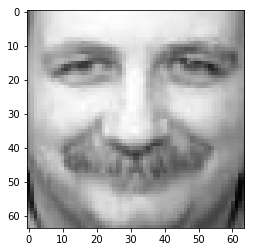

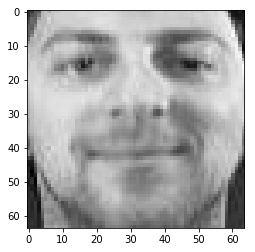

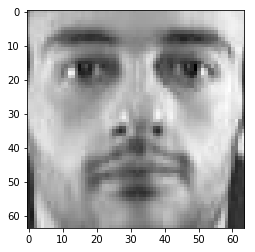

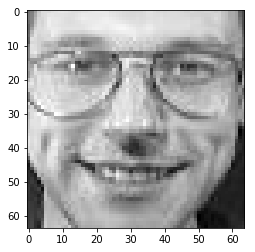

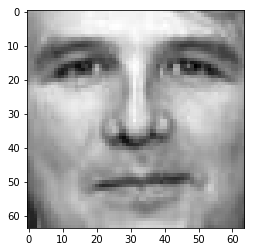

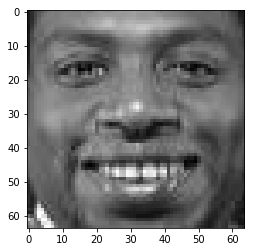

In [3]:
for j in list(range(10)):
    plt.figure()
    plt.imshow(face_list[j], cmap=plt.cm.gray)


In [4]:
len(face_list)

400

In [5]:
import itertools
face_list[0]

array([[186, 183, 179, ...,  25,  63,  71],
       [183, 183, 181, ...,  31,  34,  68],
       [179, 184, 185, ...,  48,   9,  59],
       ..., 
       [ 32,  27,  23, ...,   3,   3,   4],
       [ 26,  28,  24, ...,   5,   2,   4],
       [ 18,  29,  33, ...,   9,   3,   5]], dtype=uint8)

# Part B

In [6]:
image = []
for j in range(0,399):
    k = list(itertools.chain.from_iterable(face_list[j]))
    image.append(k)
df = pd.DataFrame(image) #inserted image into df
df.head()    


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117


In [7]:
label = pd.read_csv("./face/label.csv")

In [8]:
labels = label['Label']

In [9]:
labels

0      13
1      30
2      34
3      19
4      24
5       6
6      15
7      26
8      14
9      21
10      3
11     13
12     11
13     34
14      1
15      5
16     29
17     14
18     20
19     19
20     17
21     26
22     12
23     34
24     17
25     31
26      7
27      1
28     28
29     10
       ..
370    24
371    11
372    26
373     7
374    33
375     2
376    16
377    33
378    38
379    17
380    38
381     3
382    19
383    31
384     8
385     7
386     8
387    29
388    24
389    27
390    21
391     0
392    35
393    19
394    25
395    32
396    19
397    11
398     4
399    17
Name: Label, Length: 400, dtype: int64

In [10]:
returna = df.values
min_max_scaler = preprocessing.MinMaxScaler()
returneda = min_max_scaler.fit_transform(returna)
df = pd.DataFrame(returneda)

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [11]:
df.columns = df.columns.astype(str)
feat = list(range(4096))
feat = list(map(lambda x: str(x), feat))
col = df[feat]
print(col)

            0         1         2         3         4         5      6  \
0    0.759184  0.746888  0.719512  0.744094  0.834677  0.864542  0.864   
1    0.832653  0.809129  0.780488  0.763780  0.778226  0.768924  0.740   
2    0.351020  0.315353  0.325203  0.370079  0.383065  0.398406  0.464   
3    0.248980  0.360996  0.390244  0.464567  0.560484  0.613546  0.676   
4    0.404082  0.543568  0.662602  0.716535  0.790323  0.828685  0.840   
5    0.179592  0.228216  0.365854  0.381890  0.689516  0.768924  0.684   
6    0.489796  0.684647  0.739837  0.724409  0.721774  0.713147  0.740   
7    0.453061  0.510373  0.646341  0.783465  0.866935  0.868526  0.860   
8    0.644898  0.659751  0.674797  0.681102  0.705645  0.741036  0.764   
9    0.106122  0.178423  0.272358  0.326772  0.366935  0.430279  0.464   
10   0.032653  0.219917  0.126016  0.200787  0.427419  0.621514  0.816   
11   0.485714  0.684647  0.662602  0.637795  0.733871  0.776892  0.812   
12   0.771429  0.834025  0.833333  0.8

# Part D

In [12]:
df['4096'] = labels
test = df['4096']
test.head()
X_train, X_test, y_train, y_test = train_test_split(col, test, test_size=0.25, random_state=5)


# Part E

In [13]:
from sklearn.decomposition import PCA
k = 50
my_pca = PCA(n_components = k)
X_Train_new = my_pca. fit_transform(X_train)
X_Test_new = my_pca. transform(X_test)

# Part F

In [14]:
from sklearn.svm import SVC
my_SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
my_SVM.fit (X_Train_new, y_train)
y_predict = my_SVM.predict (X_Test_new)
print(y_predict)

[35 32 37 37 37 28 21 24 35 28 37 37 30 21 27 30 30 37 37 27 37 37 35 37 37
 37 21 37 37  3  7 30 35 37 37 30 37 37 37 35 39 37 27 37 37 27 27 27 37 28
 27 37 37 37 29 30 37 37 35 35 37 37 37  7 37 37 30 27 39 37 37 24 27 30  3
 37 27 37 37 35 37  3 37 27 30 37 37 37 37 37 37 30 28 35 30 30 30 37 28 37]


In [15]:
score_svm = accuracy_score(y_test, y_predict)
print(score_svm)

from sklearn import metrics

cm_SVM = metrics.confusion_matrix(y_test, y_predict)
print("Confusion matrix:")
print(cm_SVM)

0.08
Confusion matrix:
[[0 0 0 ..., 4 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 1 0 0]]


# Part G

In [16]:
from sklearn.model_selection import GridSearchCV
nums = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]
parameters = {'C': nums}
print(parameters, '\n')

grid = GridSearchCV(my_SVM, parameters, cv=10, scoring='accuracy')
grid.fit(my_pca.fit_transform(col), test)
print(grid.best_score_)
print(grid.best_params_)

{'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]} 



C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.977443609023
{'C': 10}
